In [ ]:
!pip install plotnine

In [2]:
import pandas as pd
import numpy as np
import random
import itertools
import plotnine
from plotnine import *

In [3]:
# List of random data points
list_random = []
# Generate 10 random data points
for _ in range(10):
    l = round(number = random.random() * 10, ndigits = 5)
    list_random.append(l)

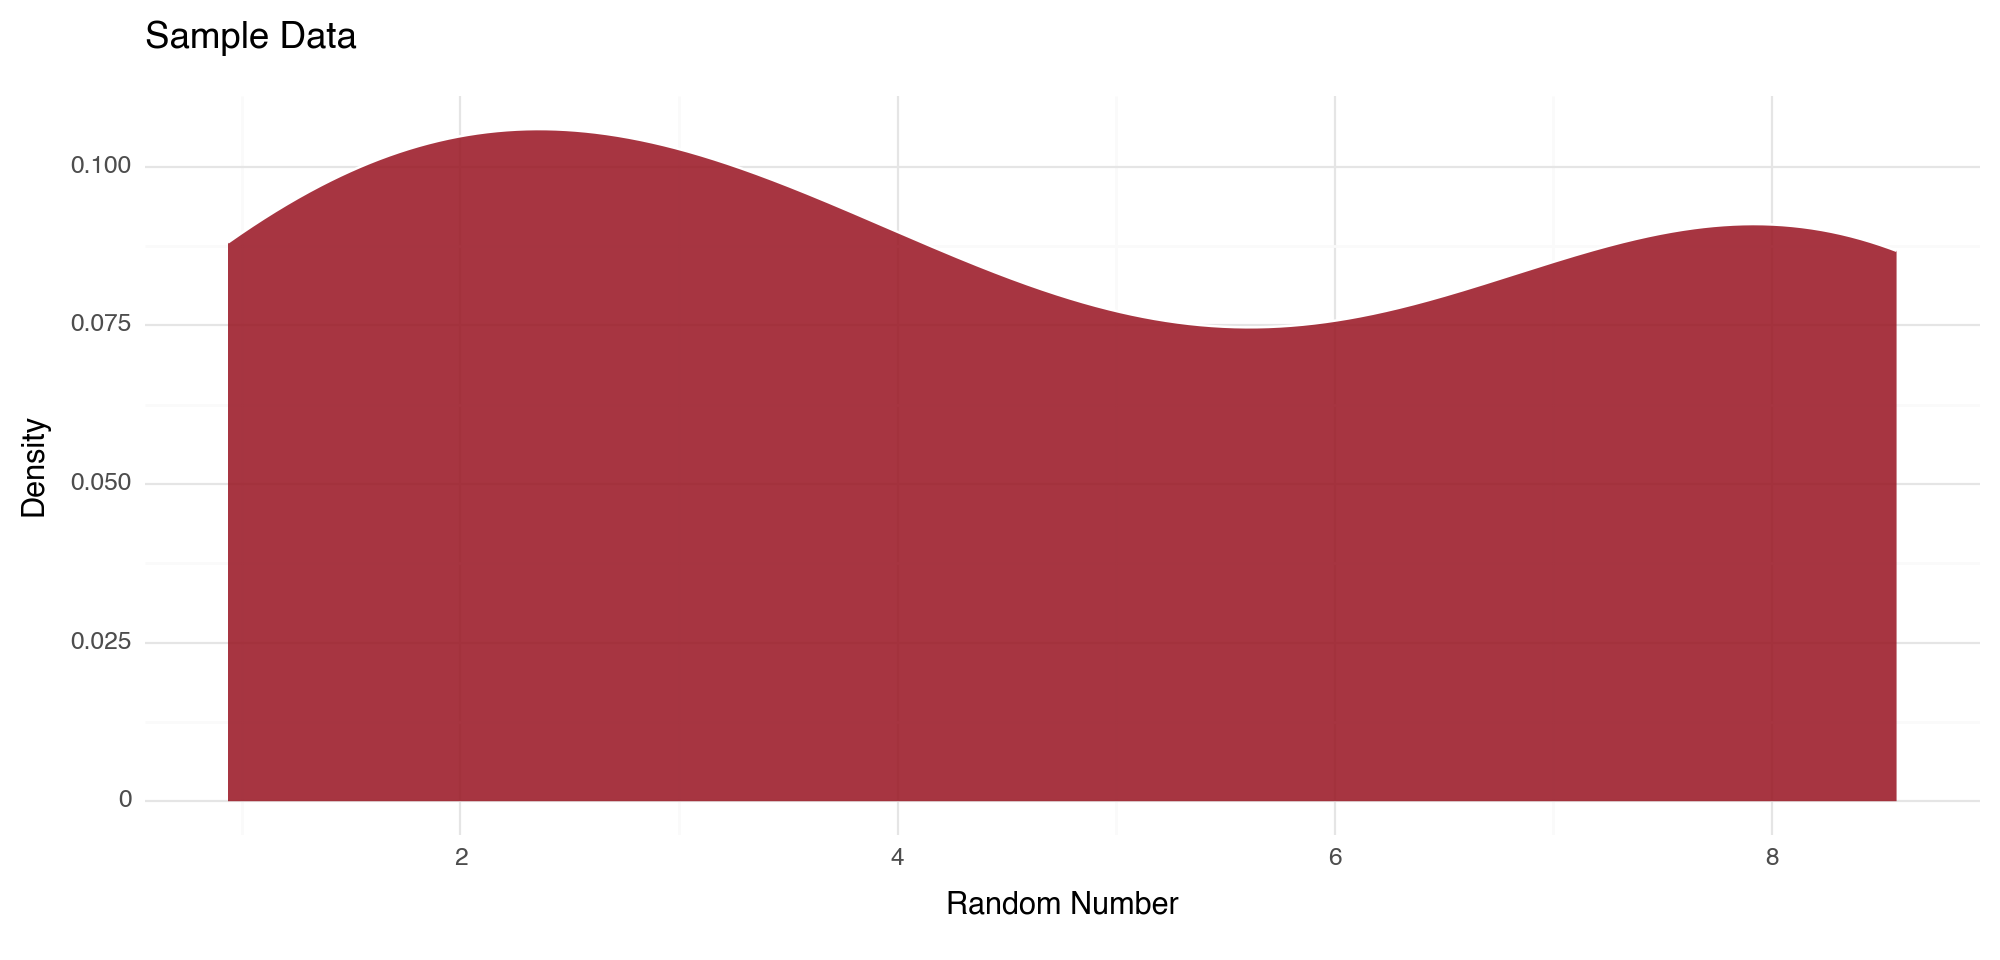

<Figure Size: (1000 x 480)>

In [5]:
# Data viz
plotnine.options.figure_size = (10, 4.8)
(
    ggplot()+
    geom_density(aes(x = list_random),
                 fill = '#981220',
                 color = '#FFFFFF',
                 alpha = 0.85)+
    labs(title = 'Sample Data')+
    xlab('Random Number')+
    ylab('Density')+
    theme_minimal()
)

# Bootstrapping for Confidence Intervals

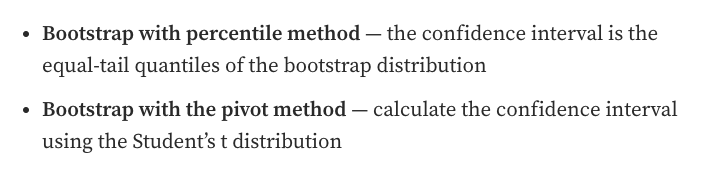

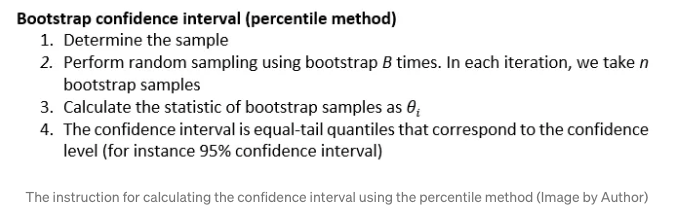

In [6]:
# Number of bootstrap (repetition)
n_bootstrap = 50000
# List of statistic of bootstrap sample
list_bootstrapped = []
for _ in range(n_bootstrap):
    # Generate bootstrap sample
    l = np.random.choice(a = list_random, size = 10, replace = True)
    # Append the statistic of bootstrap sample
    list_bootstrapped.append(l.mean())

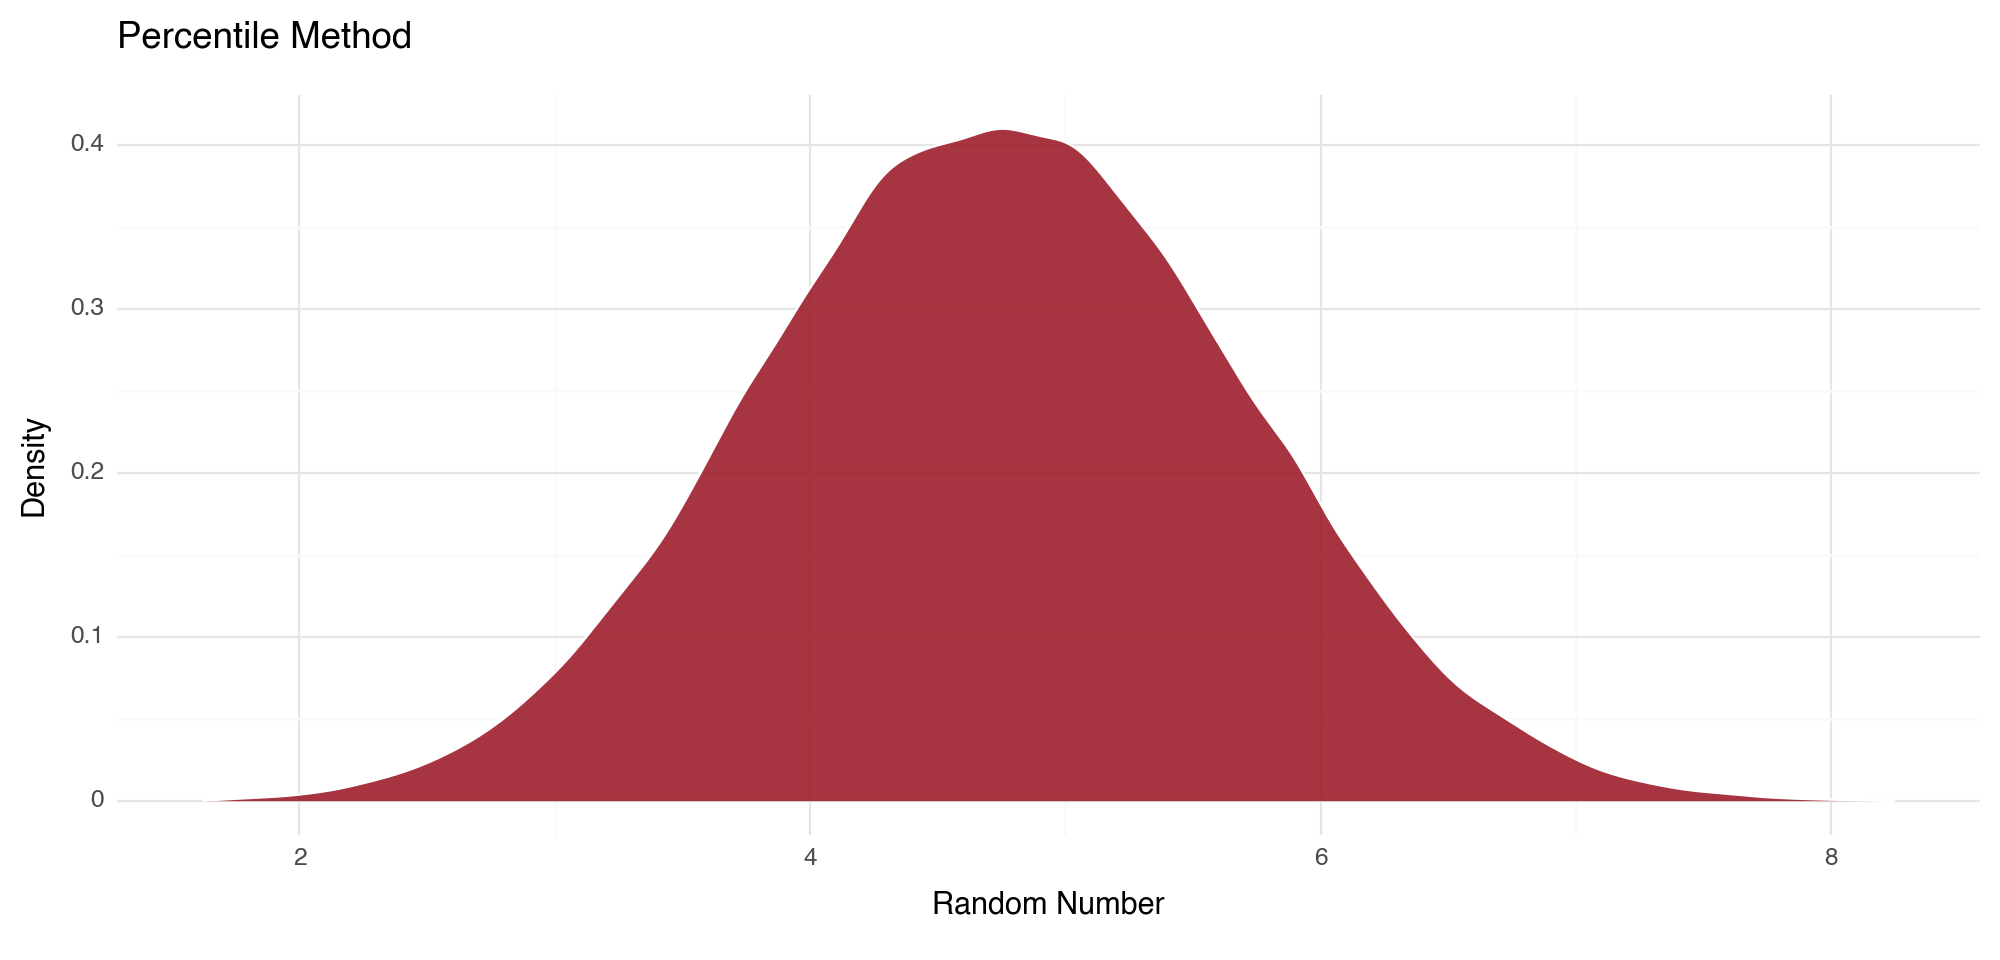

<Figure Size: (1000 x 480)>

In [7]:
# Data viz
plotnine.options.figure_size = (10, 4.8)
(
    ggplot()+
    geom_density(aes(x = list_bootstrapped),
                 fill = '#981220',
                 color = '#FFFFFF',
                 alpha = 0.85)+
    labs(title = 'Percentile Method')+
    xlab('Random Number')+
    ylab('Density')+
    theme_minimal()
)

In [15]:
# Confidence interval (95%)
lower_bound = np.percentile(a = list_bootstrapped, q = 2.5)
upper_bound = np.percentile(a = list_bootstrapped, q = 97.5)
print(f'Confidence interval (percentile): {lower_bound} - {upper_bound}')

Confidence interval (percentile): -1.9353377579201216 - 1.9698567022179039


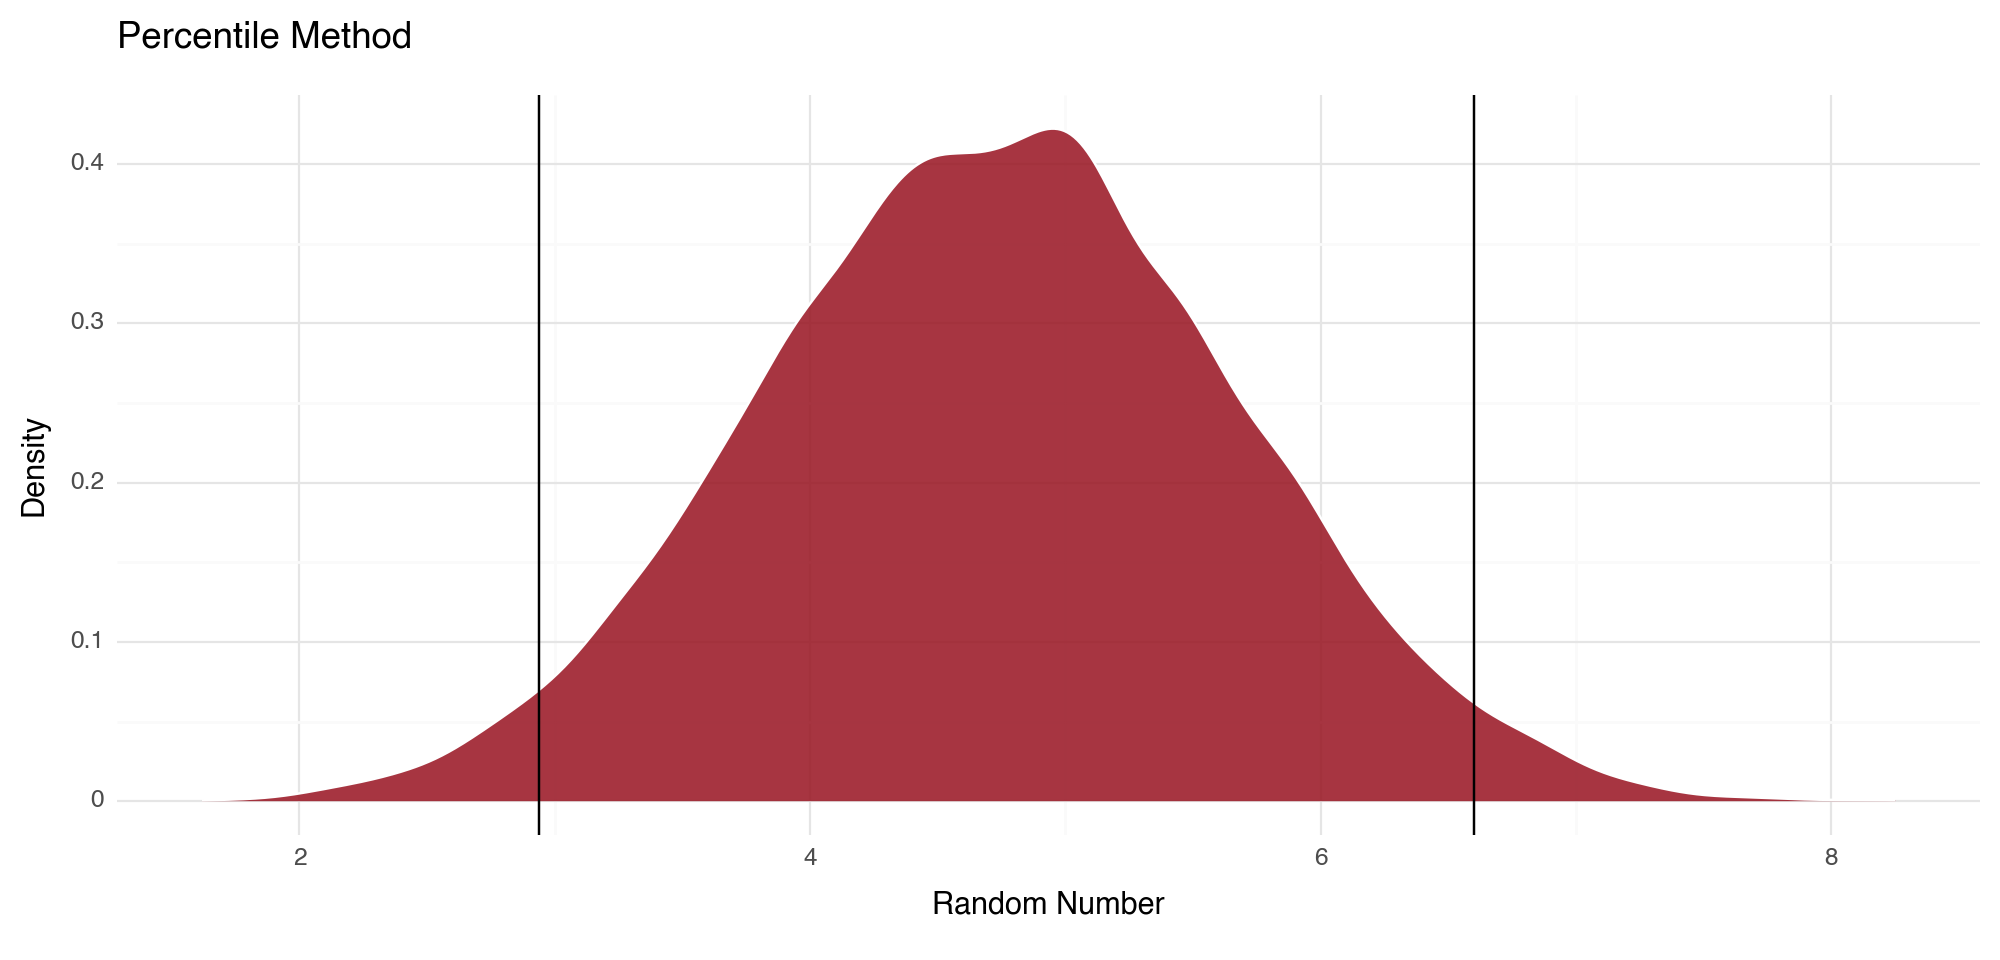

<Figure Size: (1000 x 480)>

In [9]:
# Data viz
plotnine.options.figure_size = (10, 4.8)
(
    ggplot()+
    geom_density(aes(x = random.sample(list_bootstrapped, 10000)),
                 fill = '#981220',
                 color = '#FFFFFF',
                 alpha = 0.85)+
    geom_vline(xintercept = lower_bound)+
    geom_vline(xintercept = upper_bound)+
    labs(title = 'Percentile Method')+
    xlab('Random Number')+
    ylab('Density')+
    theme_minimal()
)

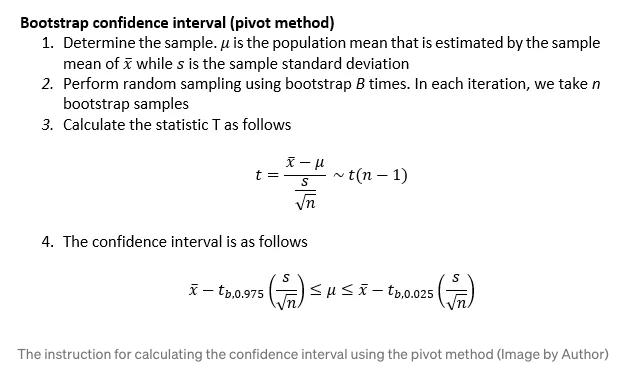

In [11]:
# Number of sample
pop_n = len(list_random)
# Sample mean
pop_mean = np.array(list_random).mean()
# Sample standard deviation
pop_sd = np.array(list_random).std()
# Number of bootstrap (repetition)
n_bootstrap = 50000
# List of statistic of bootstrap sample
list_bootstrapped = []
for _ in range(n_bootstrap):
    # Generate boostrap sample
    l = np.random.choice(a = list_random, size = 10, replace = True)
    # Append the statistic of bootstrap sample
    value = (l.mean() - pop_mean) / (pop_sd / np.sqrt(pop_n))
    list_bootstrapped.append(value)

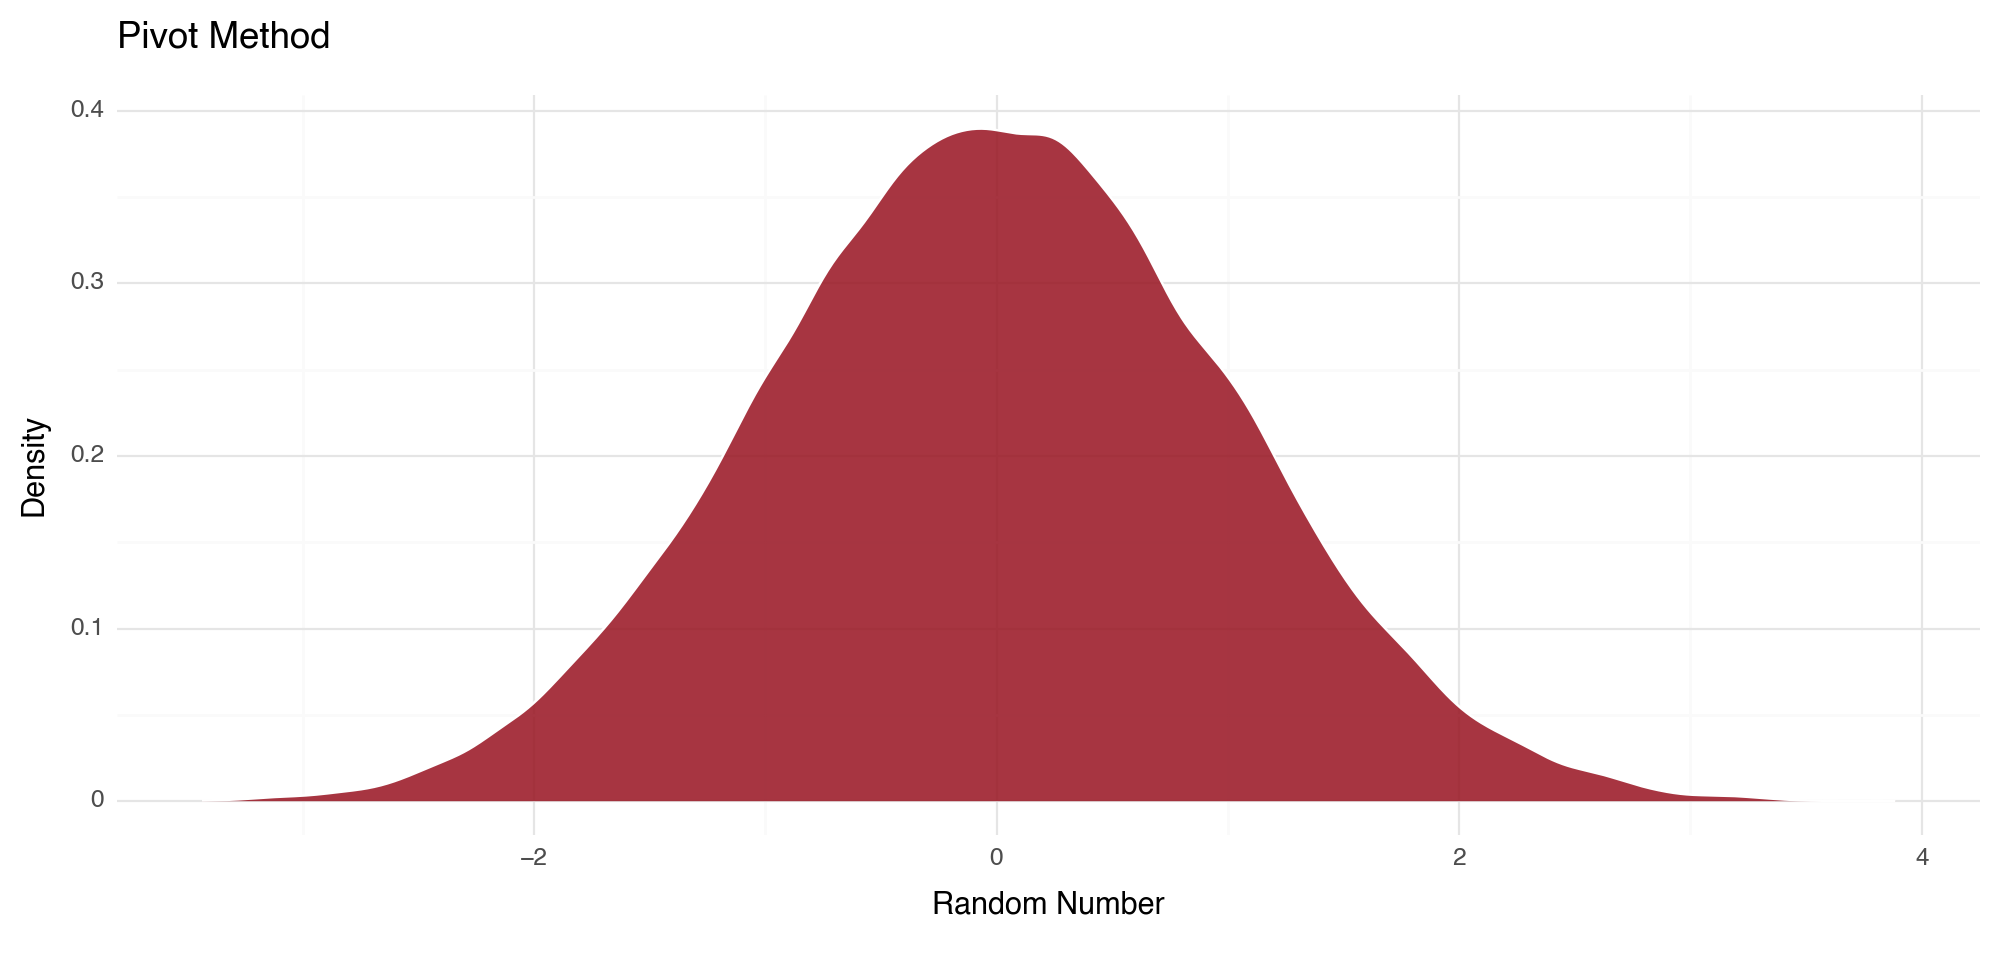

<Figure Size: (1000 x 480)>

In [13]:
# Data viz
plotnine.options.figure_size = (10, 4.8)
(
    ggplot()+
    geom_density(aes(x = list_bootstrapped),
                 fill = '#981220',
                 color = '#FFFFFF',
                 alpha = 0.85)+
    labs(title = 'Pivot Method')+
    xlab('Random Number')+
    ylab('Density')+
    theme_minimal()
)

In [16]:
# If population standard deviation is present, Z-test else t-test
# Lower and upper bound of bootstrap sample
lower_bound = np.percentile(a = list_bootstrapped, q = 2.5)
upper_bound = np.percentile(a = list_bootstrapped, q = 97.5)
# Confidence interval
lower_limit = pop_mean - (upper_bound * pop_sd) / np.sqrt(pop_n)
upper_limit = pop_mean - (lower_bound * pop_sd) / np.sqrt(pop_n)
print(f'Confidence interval (percentile): {lower_limit} - {upper_limit}')

Confidence interval (percentile): 2.899302999999998 - 6.569774824999999


# Bootstrapping for Hypothesis Testing

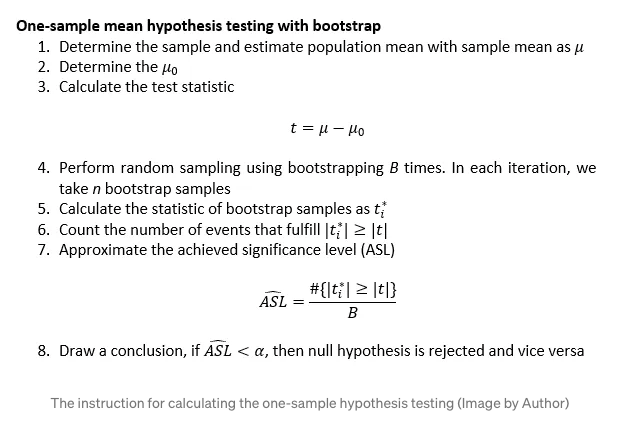

In [18]:
# Number of sample bootstrap (repetition)
n_bootstrap = 50000
# Population mean
mu = 6
# T-value
t = np.array(list_random).mean() - mu
# List of sample bootstrap
list_bootstrapped = []
# List of status
stat = []
for _ in range(n_bootstrap):
    # Generate sample boostrap
    l = np.random.choice(a = list_random, size = 10, replace = True)
    # Calculate the bootstrap statistic
    t_miu = l.mean()
    # Append the sample bootstrap
    list_bootstrapped.append(t_miu)
    # Comparison
    stat.append(abs(t_miu) >= abs(t))

In [19]:
# p-value
p_value = np.array(stat).sum() / n_bootstrap
print('p-value for one-sample problem is: {}'.format(p_value))

p-value for one-sample problem is: 1.0


In [20]:
# Fail to reject H0 under 5% significance level

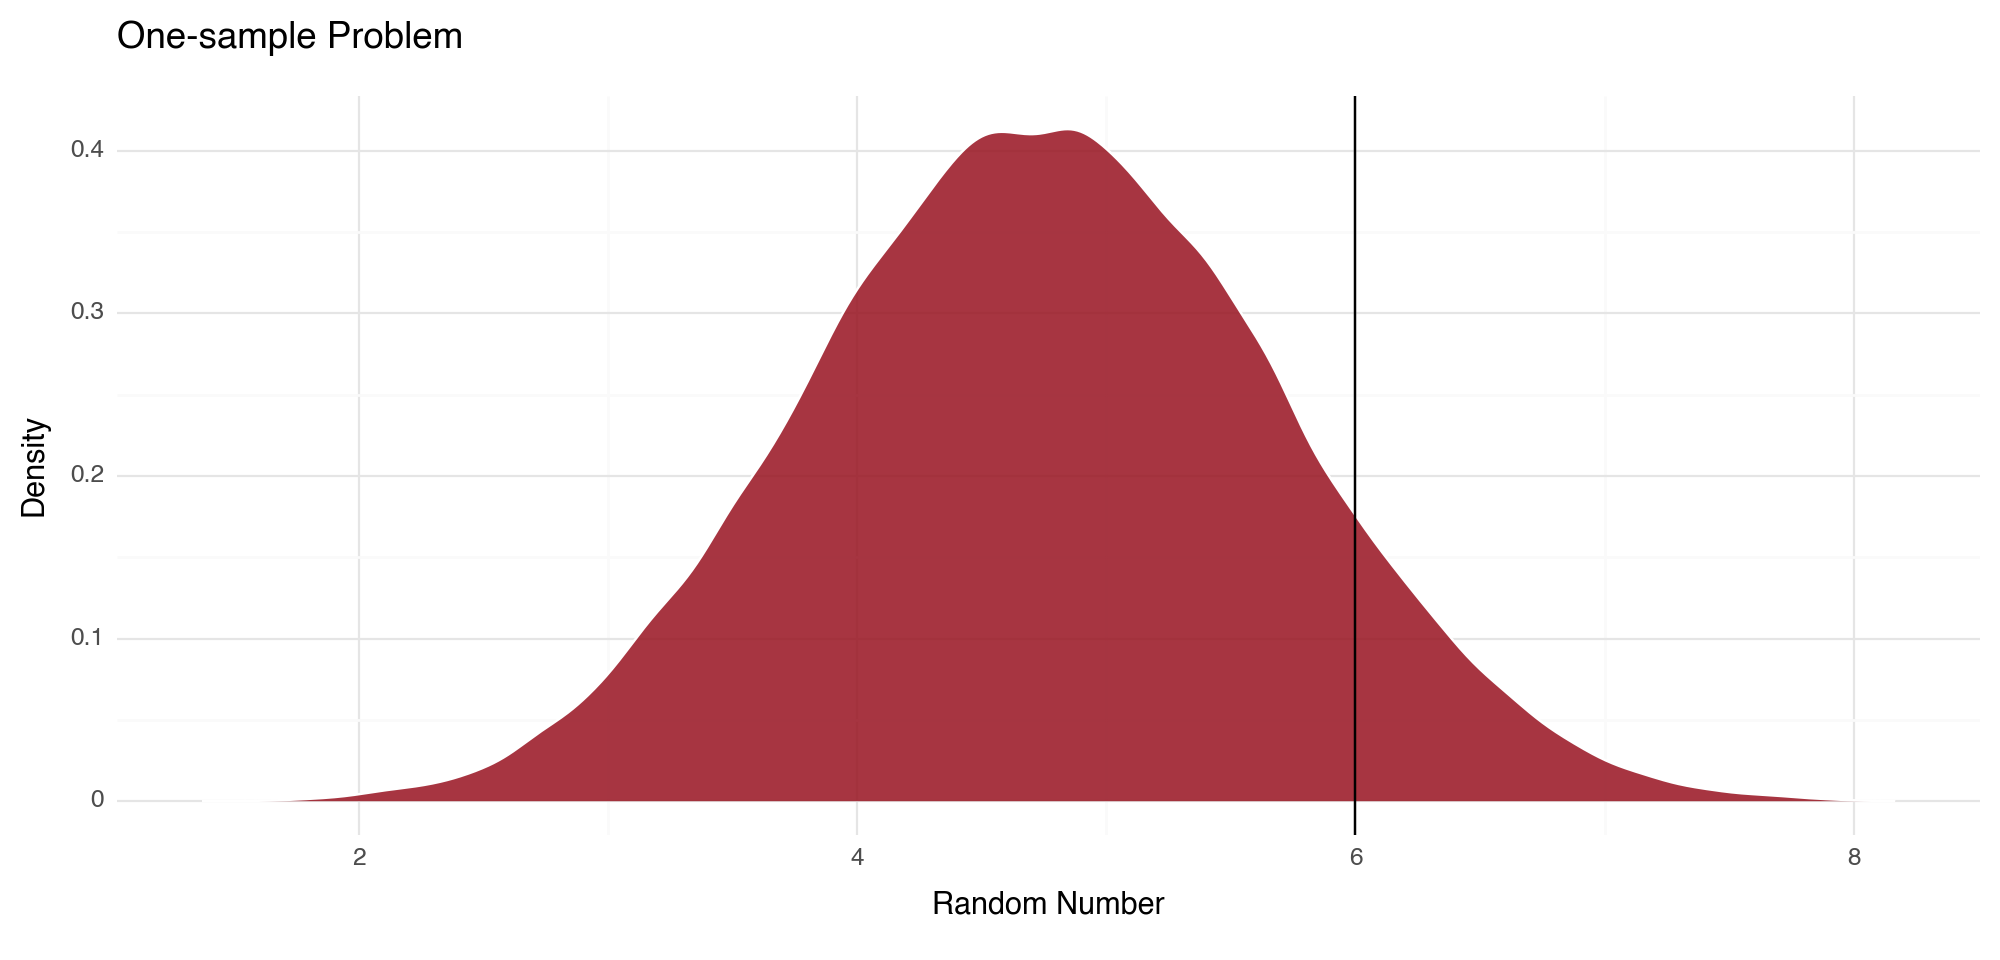

<Figure Size: (1000 x 480)>

In [21]:
# Data viz
plotnine.options.figure_size = (10, 4.8)
(
    ggplot()+
    geom_density(aes(x = list_bootstrapped),
                 fill = '#981220',
                 color = '#FFFFFF',
                 alpha = 0.85)+
    geom_vline(xintercept = mu)+
    labs(title = 'One-sample Problem')+
    xlab('Random Number')+
    ylab('Density')+
    theme_minimal()
)

# Bootstrapping in Two Sample Hypothesis

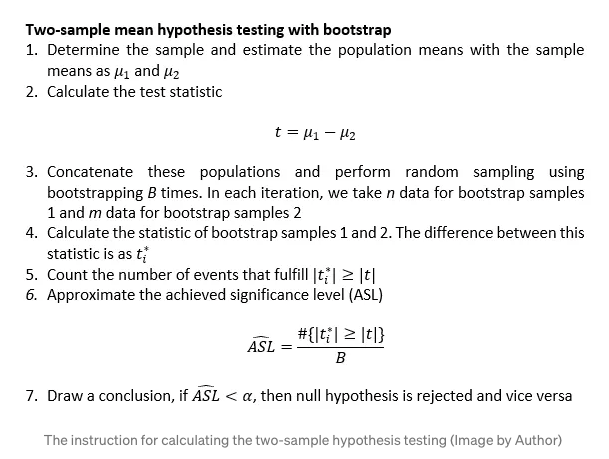

In [22]:
# Sample 1
list_random_1 = [6.50771, 8.10488, 6.97052, 9.66660, 4.45952, 8.90958, 6.58395, 0.25472, 1.69067, 6.22568]
# Sample 2
list_random_2 = [8.07601, 5.73932, 8.84482, 4.01673, 1.13725, 5.74599, 7.68432, 5.48522, 1.77523, 2.56948]


In [23]:
# Create a data frame
df = pd.DataFrame(
    data = {
        'Random Number': list_random_1 + list_random_2,
        'Population': list(itertools.chain(*[[str(i)] * len(list_random_1) for i in [1, 2]]))
    }
)

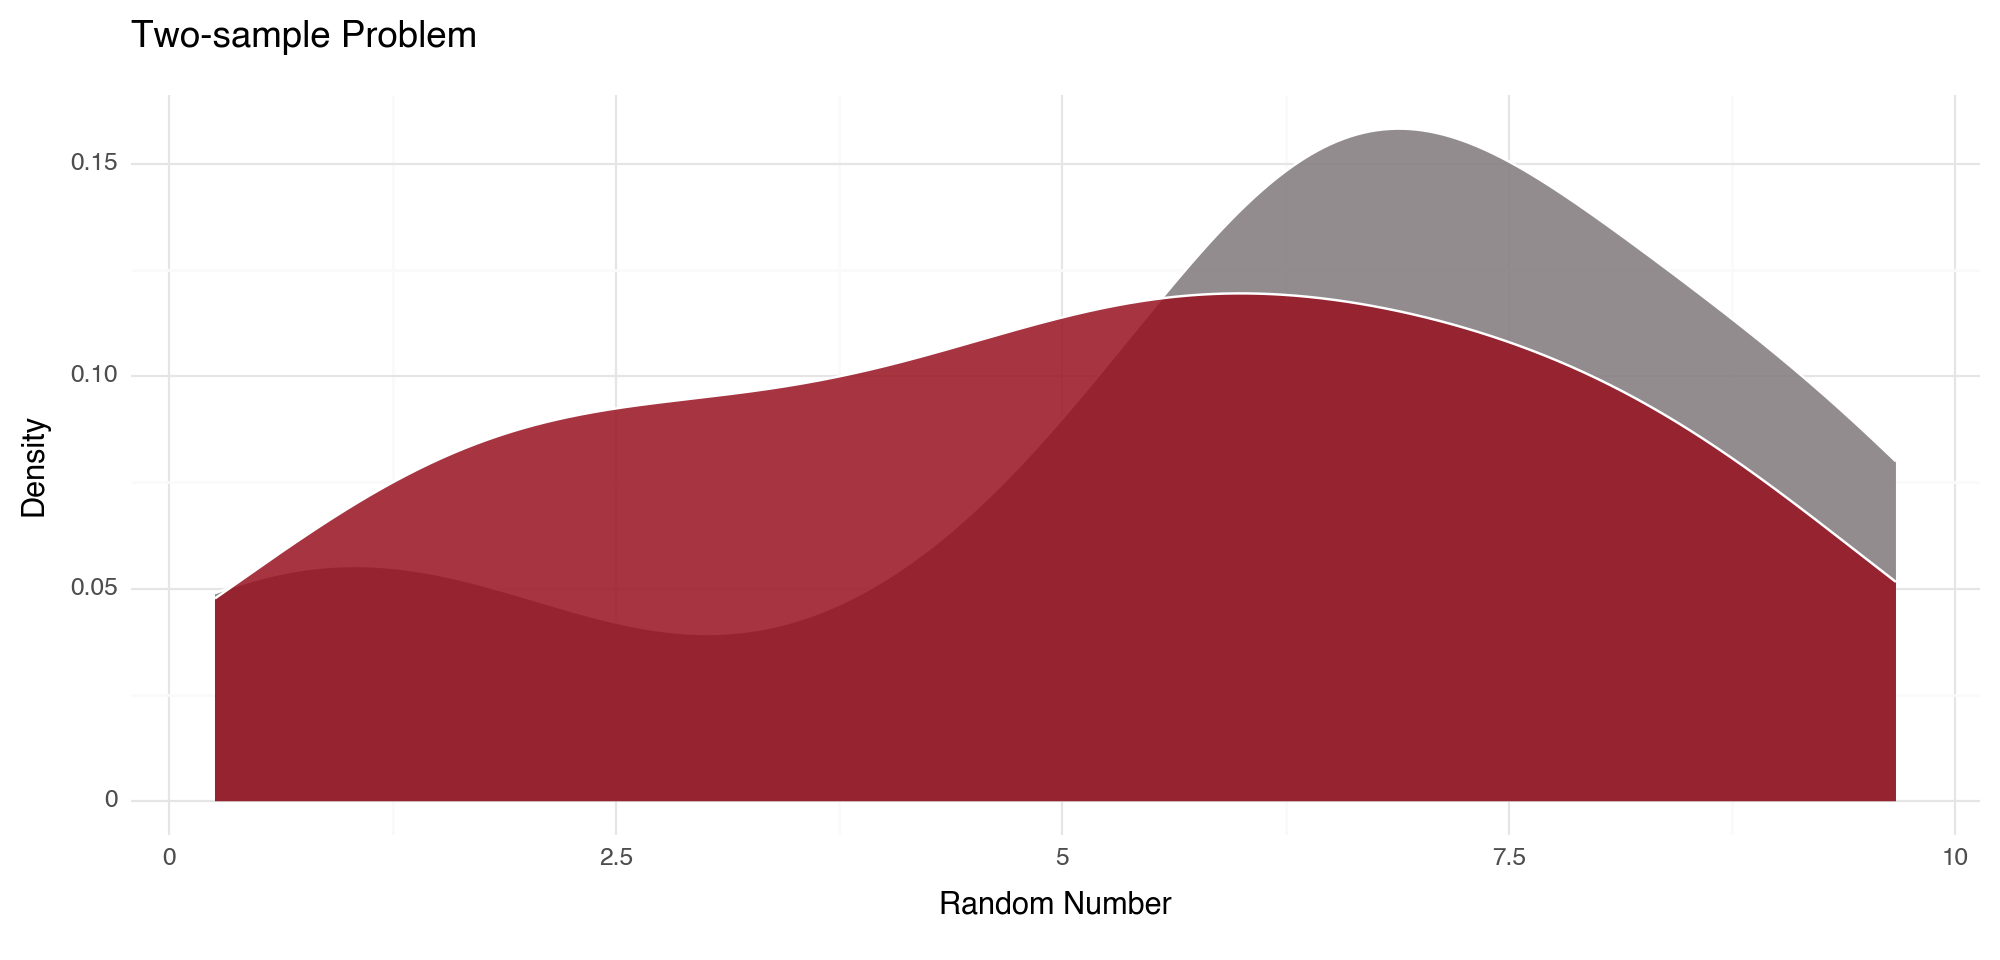

<Figure Size: (1000 x 480)>

In [25]:
# Data viz
plotnine.options.figure_size = (10, 4.8)
(
    ggplot(data = df)+
    geom_density(aes(x = 'Random Number',
                     fill = 'Population'),
                 color = '#FFFF',
                 alpha = 0.85,
                 show_legend = False)+
    labs(title = 'Two-sample Problem')+
    scale_fill_manual(name = 'Population', 
                      values = ['#80797c', '#981220'], 
                      labels = ['1', '2'])+
    xlab('Random Number')+
    ylab('Density')+
    theme_minimal()
)


In [29]:
# Number of bootstrap
n_bootstrap = 50000
# T-value
t = np.array(list_random_1).mean() - np.array(list_random_2).mean()
# List of sample boostrap
list_bootstrapped = []
# List of status
stat = []
# Sample bootstrap means from 1 & 2
sample_means = []
for _ in range(n_bootstrap):
    # Generate sample boostrap
    l = np.random.choice(a = list_random_1 + list_random_2, size = 20, replace = True)
    # Split the sample boostrap
    sample_1 = l[:len(list_random_1)]
    sample_2 = l[len(list_random_2):]
    
    # Sample boostrap mean
    mean_1 = np.array(sample_1).mean()
    mean_2 = np.array(sample_2).mean()
    
    # Append the sample boostrap mean
    sample_means.append((mean_1, mean_2))
    # Calculate the boostrap sample statistic
    t_miu = mean_1 - mean_2
    
    # Append the boostrap
    list_bootstrapped.append(t_miu)
      
    # Comparison
    stat.append(abs(t_miu) >= abs(t))

In [31]:
# p-value
p_value = np.array(stat).sum() / n_bootstrap
print('p-value for two-sample problem is: {}'.format(p_value))

p-value for two-sample problem is: 0.5015


In [32]:
# Fail to reject H0 under 5% significance level

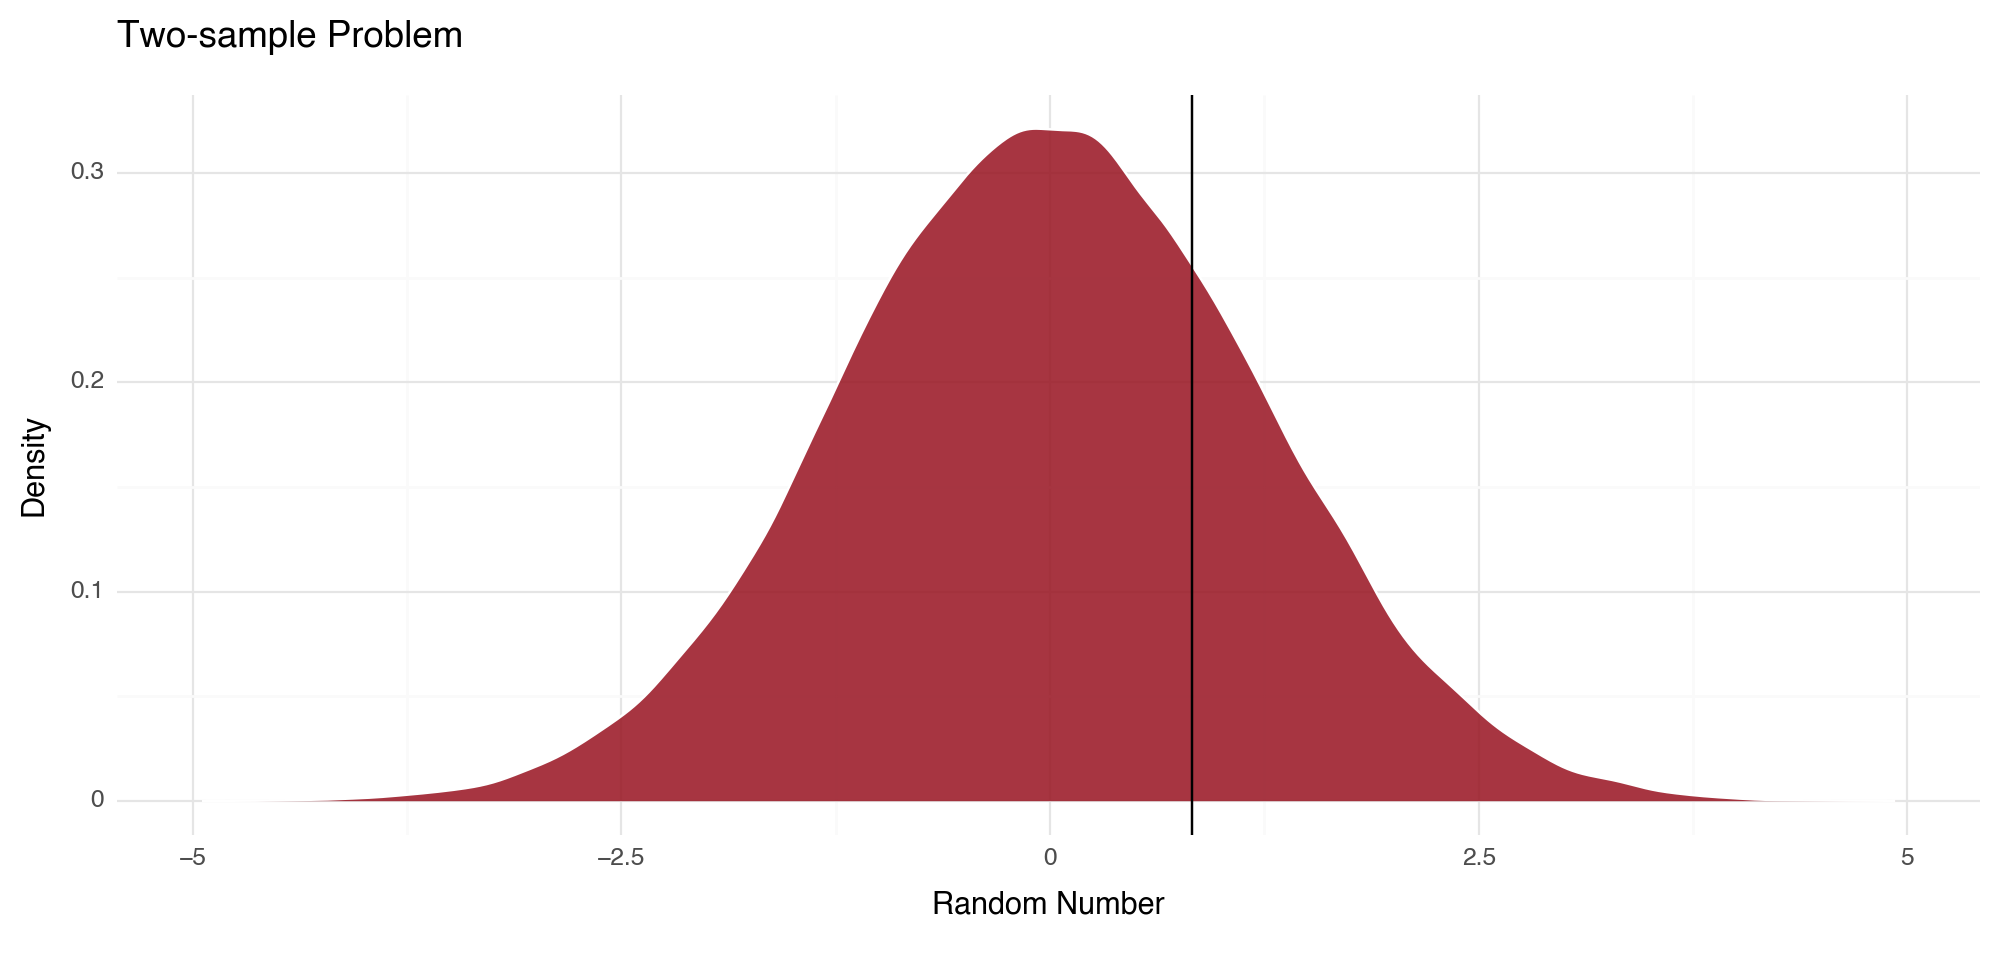

<Figure Size: (1000 x 480)>

In [33]:
# Data viz
plotnine.options.figure_size = (10, 4.8)
(
    ggplot()+
    geom_density(aes(x = list_bootstrapped),
                 fill = '#981220',
                 color = '#FFFFFF',
                 alpha = 0.85)+
    geom_vline(xintercept = t)+
    labs(title = 'Two-sample Problem')+
    xlab('Random Number')+
    ylab('Density')+
    theme_minimal()
)